<a href="https://colab.research.google.com/github/Tarasishbhattacharya/bank_customers_churn/blob/main/Bank_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_dir="/content/drive/MyDrive/dat/"
bank_df=pd.read_csv(working_dir+"Bank_data.csv")

In [ ]:
bank_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
bank_df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [ ]:
bank_df.shape

(10000, 11)

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
#  drop customer id
bank_df.drop("customer_id",axis=1,inplace=True)

In [ ]:
bank_df.head(1)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [ ]:
bank_df["credit_score"].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [ ]:
bank_df["credit_score"].min(),bank_df["credit_score"].max()

(350, 850)

<Axes: xlabel='credit_score'>

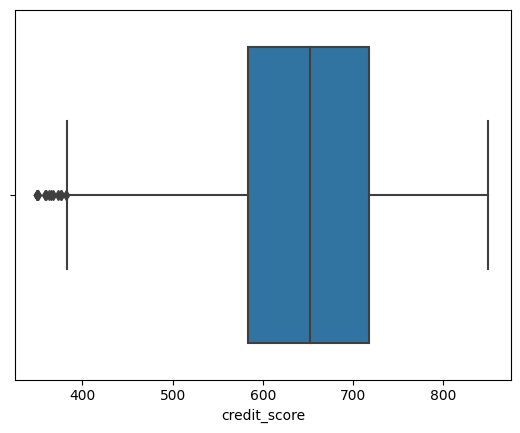

In [ ]:
sns.boxplot(x="credit_score",data=bank_df)

In [ ]:
def range(score):
  if(score>=350 and score <=450):
    return "350-450"
  elif(score>450 and score<=550):
    return "450-550"
  elif(score>550 and score<=650):
    return "550-650"
  elif(score>650 and score<=750):
    return "650-750"
  elif(score>750 and score<=850):
    return "750-850"

bank_df["credit_range"]=bank_df["credit_score"].apply(range)

In [ ]:
bank_df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_range
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,550-650
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,550-650
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,450-550
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,650-750
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,750-850


<Axes: xlabel='credit_range', ylabel='count'>

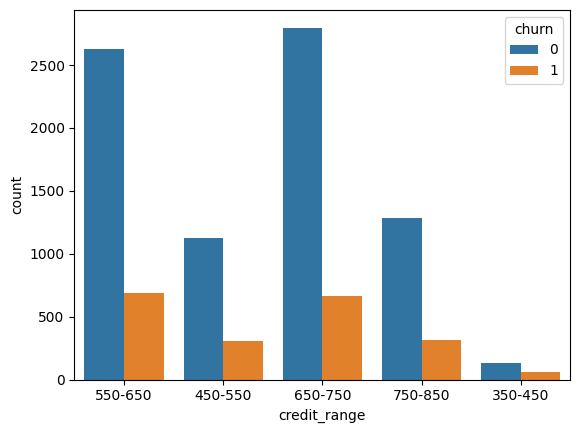

In [ ]:
sns.countplot(x="credit_range",hue="churn",data=bank_df)

In [ ]:
bank_df["country"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

<Axes: xlabel='country', ylabel='count'>

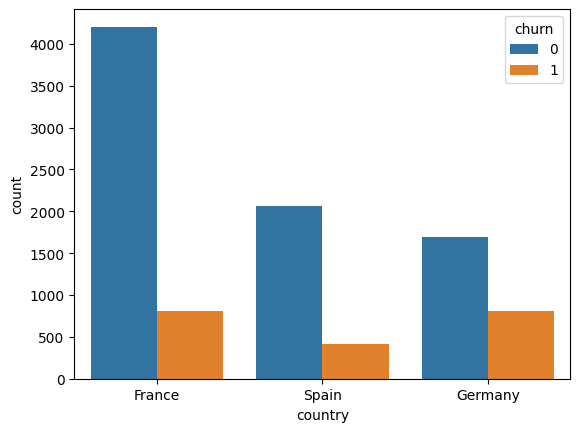

In [ ]:
sns.countplot(x="country",hue="churn",data=bank_df)

In [ ]:
bank_df["gender"].unique()

array(['Female', 'Male'], dtype=object)

<Axes: xlabel='gender', ylabel='count'>

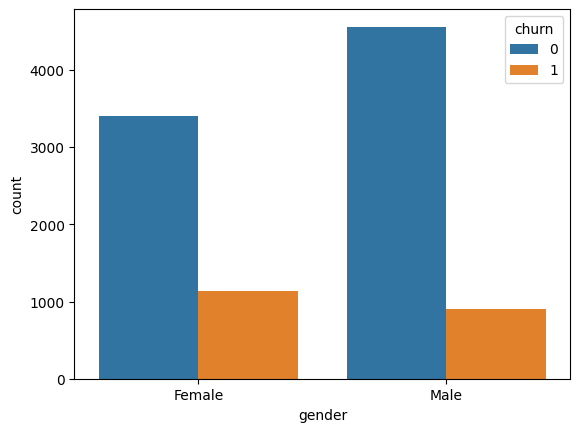

In [ ]:
sns.countplot(x="gender",hue="churn",data=bank_df)

In [ ]:
bank_df["age"].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [ ]:
bank_df["age"].min(),bank_df["age"].max()

(18, 92)

In [ ]:
def range(age):
  if(age>=18 and age <=28):
    return "18-28"
  elif(age>28 and age<=38):
    return "28-38"
  elif(age>38 and age<=49):
    return "39-49"
  elif(age>49 and age<=59):
    return "50-59"
  elif(age>59 and age<=69):
    return "60-69"
  elif(age>69 and age<=79):
    return "70-79"
  elif(age>79 and age<=89):
    return "80-89"
  elif(age>89 and age<=99):
    return "89-99"

bank_df["age_range"]=bank_df["age"].apply(range)

In [ ]:
bank_df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_range,age_range
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,550-650,39-49
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,550-650,39-49
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,450-550,39-49
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,650-750,39-49
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,750-850,39-49


<Axes: xlabel='age_range', ylabel='count'>

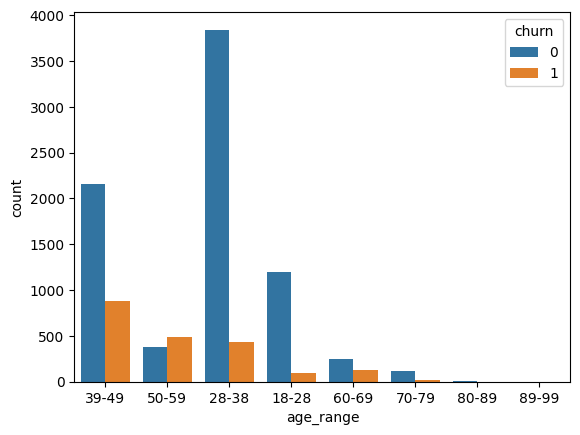

In [ ]:
sns.countplot(x="age_range",hue="churn",data=bank_df)

In [ ]:
bank_df["tenure"].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

<Axes: xlabel='tenure', ylabel='churn'>

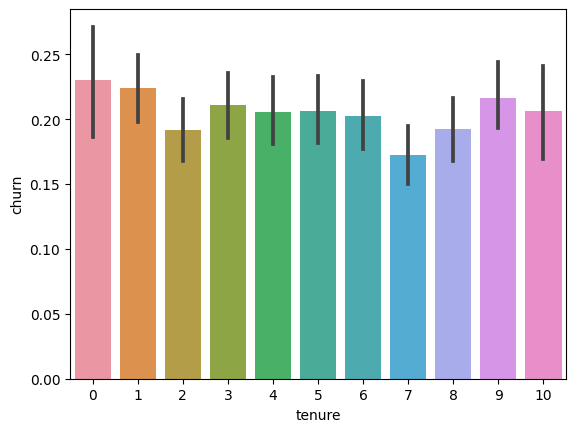

In [ ]:
sns.barplot(x=bank_df["tenure"],y=bank_df["churn"])

<Axes: xlabel='tenure', ylabel='count'>

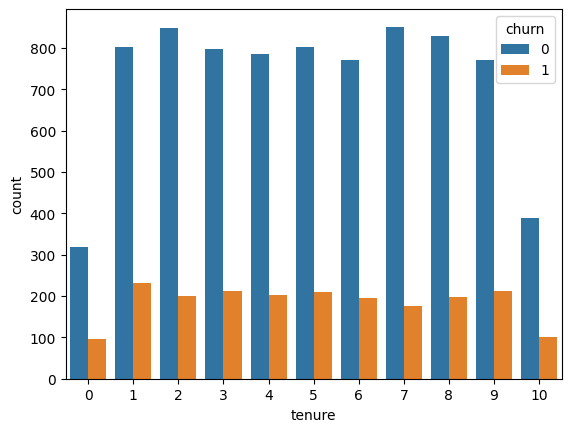

In [ ]:
sns.countplot(x="tenure",hue="churn",data=bank_df)

In [ ]:
bank_df["products_number"].value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

<Axes: xlabel='products_number', ylabel='count'>

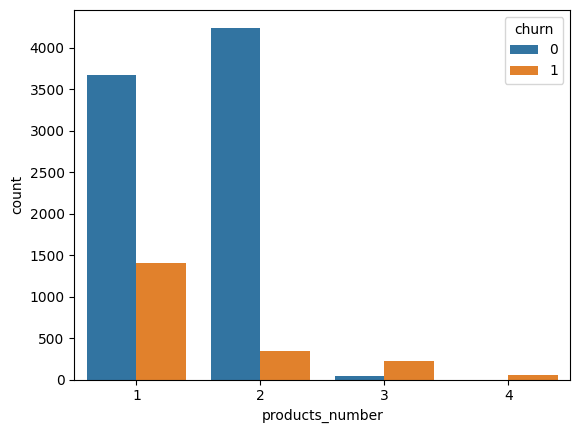

In [ ]:
sns.countplot(x="products_number",hue="churn",data=bank_df)

In [ ]:
bank_df["credit_card"].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

<Axes: xlabel='credit_card', ylabel='count'>

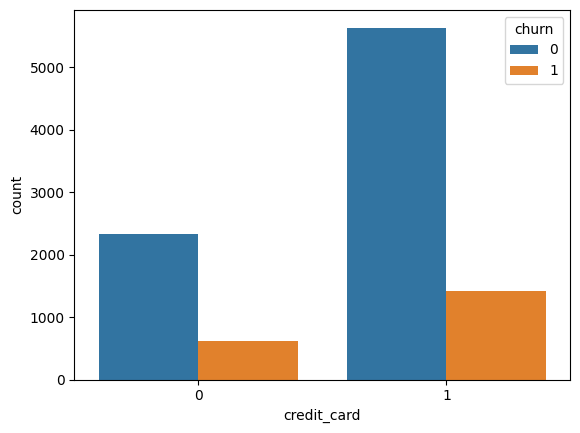

In [ ]:
sns.countplot(x="credit_card",hue="churn",data=bank_df)

In [ ]:
bank_df["active_member"].value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

<Axes: xlabel='active_member', ylabel='count'>

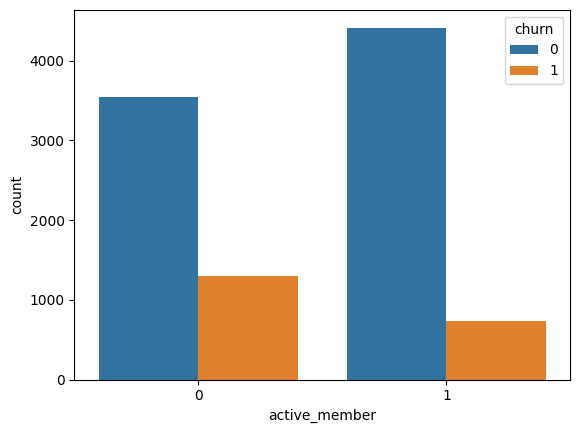

In [ ]:
sns.countplot(x="active_member",hue="churn",data=bank_df)

In [ ]:
bank_df.groupby("churn").mean()

<ipython-input-58-7a62da7cb5c3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bank_df.groupby("churn").mean()


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [ ]:
bank_df["balance"].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

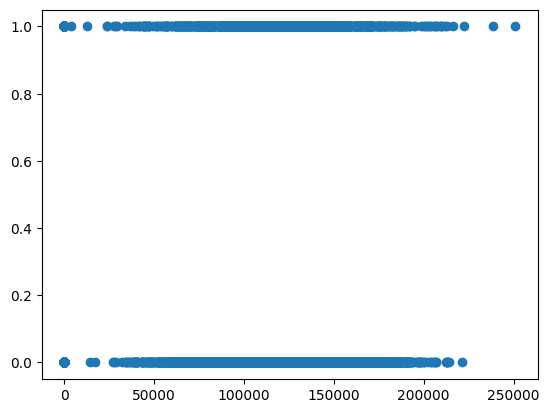

In [ ]:
plt.scatter(x=bank_df["balance"],y=bank_df["churn"])

In [ ]:
bank_df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_range,age_range
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,550-650,39-49
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,550-650,39-49
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,450-550,39-49
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,650-750,39-49
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,750-850,39-49


<Axes: xlabel='credit_range', ylabel='count'>

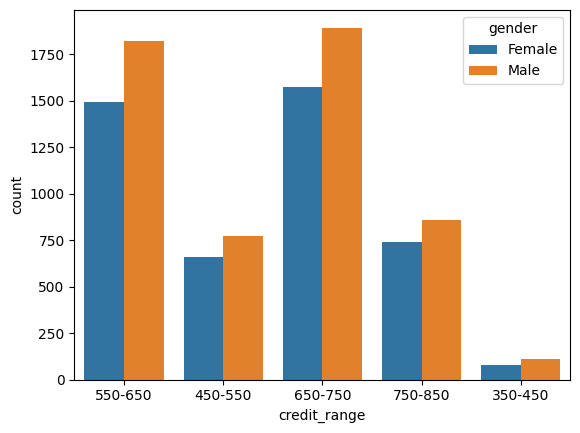

In [ ]:
sns.countplot(x="credit_range",hue="gender",data=bank_df)

<Axes: xlabel='credit_card', ylabel='count'>

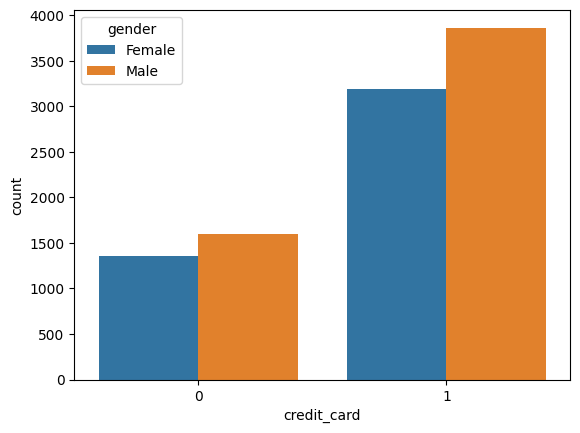

In [ ]:
sns.countplot(x="credit_card",hue="gender",data=bank_df)

<Axes: xlabel='active_member', ylabel='products_number'>

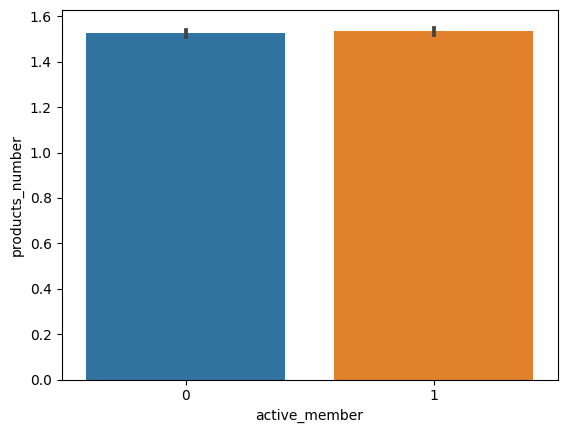

In [ ]:
sns.barplot(x=bank_df["active_member"],y=bank_df["products_number"])

<Axes: xlabel='age_range', ylabel='count'>

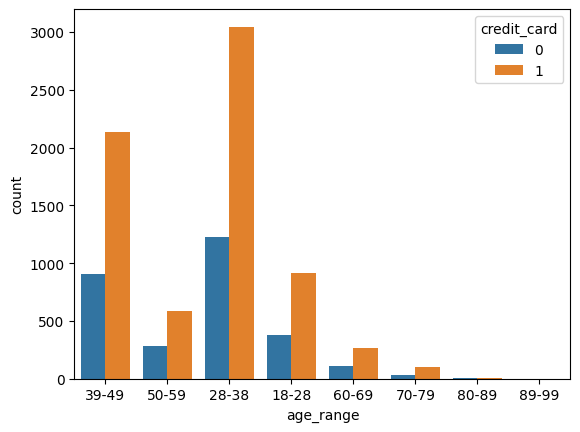

In [ ]:
sns.countplot(x="age_range",hue="credit_card",data=bank_df)

<Axes: xlabel='country', ylabel='count'>

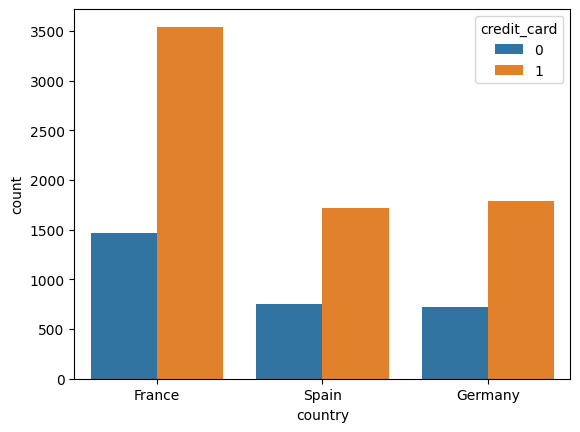

In [ ]:
sns.countplot(x="country",hue="credit_card",data=bank_df)

In [ ]:
bank_df['estimated_salary'].max(),bank_df["estimated_salary"].min()

(199992.48, 11.58)

In [ ]:
bank_df.groupby("age_range")["estimated_salary"].max().reset_index().sort_values(by="estimated_salary",ascending=False).head()


,age_range,estimated_salary
2,39-49,199992.48
0,18-28,199953.33
1,28-38,199929.17
3,50-59,199661.50
4,60-69,199493.38


In [72]:
bank_df.head(1)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_range,age_range
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1,550-650,39-49


In [73]:
bank_df.drop(["age_range","credit_range"],axis=1,inplace=True)

In [74]:
bank_df.head(1)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
cols=["country","gender"]
le=LabelEncoder()

for col in cols:
  bank_df[col]=le.fit_transform(bank_df[col])


In [77]:
bank_df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [78]:
x=bank_df.drop("churn",axis=1)

In [79]:
x

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [80]:
y=bank_df["churn"]

In [81]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import  DecisionTreeClassifier

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)

In [86]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [88]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [89]:
accuracy_score(y_test,y_pred)

0.7893333333333333

In [97]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [98]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [99]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [100]:
accuracy_score(y_test,y_pred)

0.8566666666666667

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
models=[LogisticRegression(),DecisionTreeClassifier(criterion="entropy",max_depth=5)]

In [103]:
for model in models:
  cross_score=cross_val_score(model,x,y,cv=10)
  print("For model",model,"score is",cross_score.mean())

For model LogisticRegression() score is 0.7901
For model DecisionTreeClassifier(criterion='entropy', max_depth=5) score is 0.8541000000000001
